# Time Series and Forecasting

## Airline Passengers

In [78]:
passengers = 1.0*array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432])
dates = linspace(1949,1961,len(passengers)+1)[:-1]

In [15]:
plot(dates,passengers)

## LR04 Stack

Please cite: Lisiecki, L. E., and M. E. Raymo (2005), A Pliocene-
Pleistocene stack of 57 globally distributed benthic d18O records, 
Paleoceanography,20, PA1003, doi:10.1029/2004PA001071.

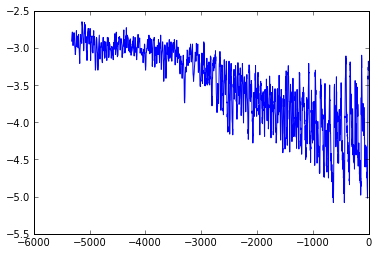

In [40]:
lr04 = genfromtxt("lisiecki-lr04stack.txt",comments="#")
ix = argsort(-lr04[:,0])
lr04time = -lr04[ix,0]
lr04d180 = -lr04[ix,1]
plot(lr04time,lr04d180)

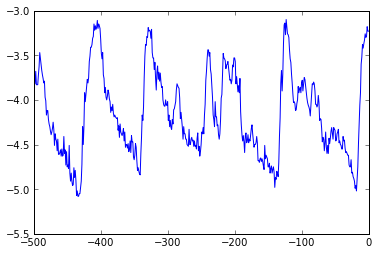

In [42]:
plot(lr04time[-500:],lr04d180[-500:])

2115

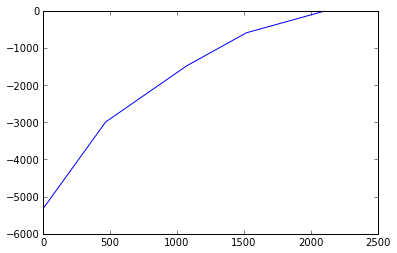

In [63]:
plot(lr04time)
len(lr04time)

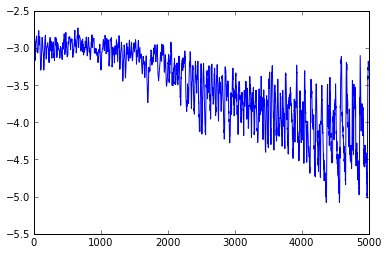

In [66]:
from scipy.interpolate import interp1d
f = interp1d(lr04time,lr04d180)
d180t = linspace(-5000,0,5000)
d180 = f(d180t)
plot(d180)

## Stock Market

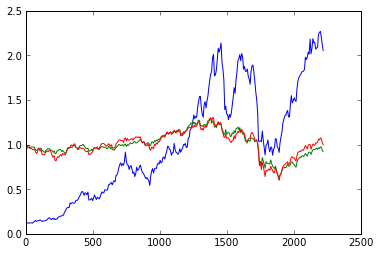

In [48]:
stocks = genfromtxt("stock-market.csv",delimiter=",")
days = stocks[:,0]
usdeur = stocks[:,2]
djia = stocks[:,4]
aapl = stocks[:,6]
msft = stocks[:,8]
nasdaq = stocks[:,10]
plot(days,aapl/mean(aapl))
plot(days,djia/mean(djia))
plot(days,nasdaq/mean(nasdaq))

# Stationarity, Periodicity

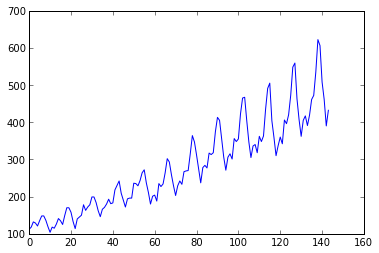

In [79]:
plot(passengers)

In [95]:
# moving average
ma = [mean(passengers[i-12:i]) for i in range(12,len(passengers))]
plot(ma)

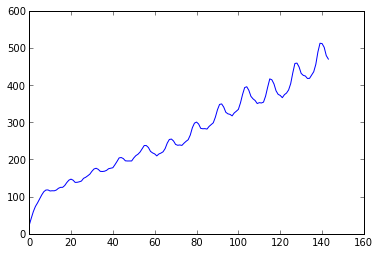

In [98]:
# exponential smoothing
es = []
y = 0
for i,x in enumerate(passengers):
    y = 0.2*x+0.8*y
    es.append(y)
plot(es)

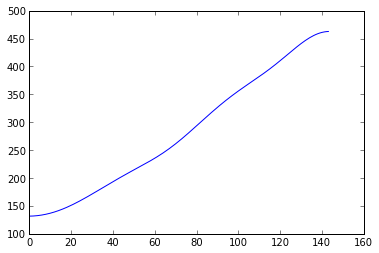

In [99]:
# Gaussian smoothing
from scipy.ndimage import filters
trend = filters.gaussian_filter(passengers,12)
plot(trend)

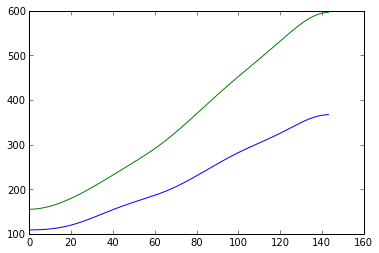

In [100]:
# local maxima and minima
hi = filters.gaussian_filter(filters.maximum_filter(passengers,12),12)
lo = filters.gaussian_filter(filters.minimum_filter(passengers,12),12)
plot(lo)
plot(hi)

In [101]:
# detrending
variation = (passengers-lo)/(hi-lo)
plot(variation)

In [102]:
# discovering periodicity by autocorrelation
ac = correlate(variation,variation,mode='full')
ac = ac[len(ac)//2:]
plot(ac)

In [103]:
# discovering periodicity by Fourier transform
plot(abs(fft.fft(variation-mean(variation)))[:40])

# Discrete Processes

- exogenous input
- dependence on past outputs
- noise

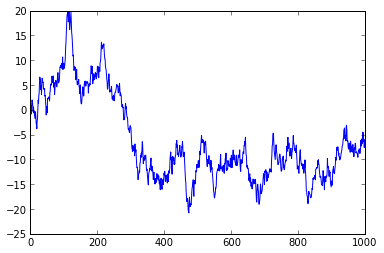

In [108]:
# random walk
ys = []
y = 0.0
for i in range(1000):
    ys.append(y)
    y = y+randn()
ys = array(ys)
plot(ys)

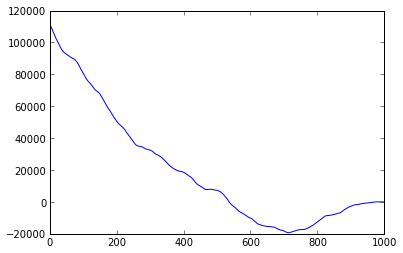

In [109]:
# discovering periodicity by autocorrelation
ac = correlate(ys,ys,mode='full')
ac = ac[len(ac)//2:]
plot(ac)

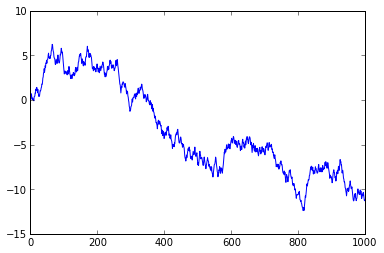

In [113]:
# random walk with uniform increments
ys = []
y = 0.0
for i in range(1000):
    ys.append(y)
    y = y+rand()-0.5
plot(ys)

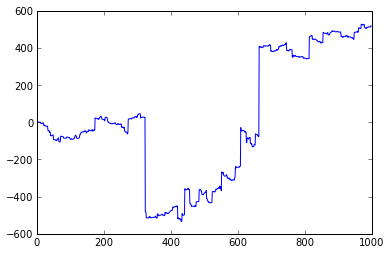

In [153]:
# random walk with long-tailed increments
from scipy import stats
ys = []
y = 0.0
for i in range(1000):
    ys.append(y)
    y = y+stats.cauchy.rvs()
plot(ys)

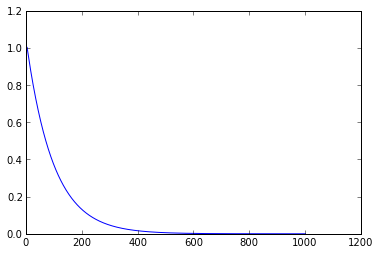

In [120]:
# autoregressive process (no noise)
ys = [0.1,0.5,1.0]
for i in range(1000):
    y = ys[-1]+0.01*ys[-2]-0.02*ys[-3]
    ys.append(y)
plot(ys)

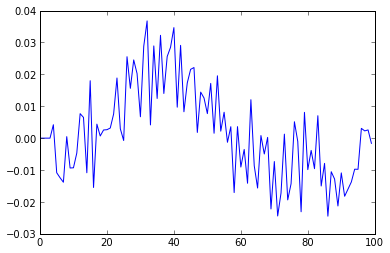

In [155]:
# autoregressive process with noise
ys = zeros(1000)
params = array([0.2,0.3,0.35])
for i in range(4,1000):
    y = dot(params,ys[i-4:i-1])+0.01*randn()
    ys[i] = y
plot(ys[:100])

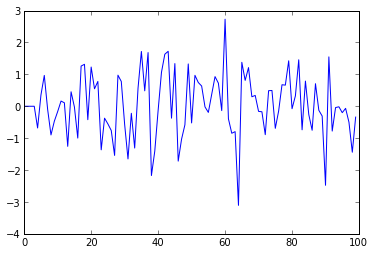

In [149]:
# moving average process with noise
ys = zeros(1000)
ns = zeros(1000)
params = array([0.1,0.1,0.1])
for i in range(4,1000):
    y = dot(params,ns[i-4:i-1])+randn()
    ys[i] = y
plot(ys[:100])

# Parameter Estimation

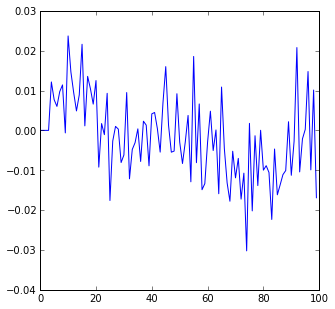

In [234]:
# autoregressive process with noise
ys = zeros(10000)
params = array([0.2,0.3,0.35])
for i in range(4,10000):
    y = dot(params,ys[i-4:i-1])+0.01*randn()
    ys[i] = y
plot(ys[:100])

We now attempt to predict the value at time $t$ as a linear combination of values at times $t-1$ through $t-4$. First, let us generate a training set.


In [235]:
data = array([ys[i-4:i-1] for i in range(4,10000)])
pred = array([ys[i] for i in range(4,10000)])

Now let us perform linear fitting.



In [236]:
from numpy import linalg
x,residuals,rank,svs = linalg.lstsq(data,pred)
x

array([ 0.22427482,  0.29612102,  0.33520334])

In [237]:
roots(x)

array([-0.66017447+1.02897009j, -0.66017447-1.02897009j])